## 1.  Cálculo de probabilidad

1. Se reparten cartas, una a la vez, de una baraja de 52 cartas.

a) Si las primeras 2 cartas son espadas, ¿cuál es la probabilidad de que las siguientes 3 cartas también
sean espadas?

b) Si las primeras 3 cartas son todas de espadas, ¿cuál es la probabilidad de que las 2 cartas siguientes
sean también espadas?

c) Si las primeras 4 cartas son todas de espadas, ¿cuál es la probabilidad de que la siguiente carta sea
también una espada?

In [12]:
import numpy as np

cartas = ["E", "O", "C", "B"] * 13

dos = 0 #Cantidad de veces que las dos primeras cartas fueron espadas
tres = 0 #Cantidad de veces que las tres primeras cartas fueron espadas
cuatro = 0 #Cantidad de veces que las tres primeras cartas fueron espadas
acierto_dos = 0
acierto_tres = 0
acierto_cuatro = 0


for i in range(10000000):
    np.random.shuffle(cartas)
    sub = cartas[0:5]
    if(sub[0:2] == ["E", "E"]):
        dos +=1
        if(sub[2:5] == ["E", "E", "E"]):
            acierto_dos +=1
    if(sub[0:3] == ["E", "E", "E"]):
        tres +=1
        if(sub[3:5] == ["E", "E"]):
            acierto_tres +=1
    if(sub[0:4] == ["E", "E", "E", "E"]):
        cuatro +=1
        if(sub[4:5] == ["E"]):
            acierto_cuatro +=1

prob_a = round(acierto_dos/dos,4)
prob_b = round(acierto_tres/tres,4)
prob_c = round(acierto_cuatro/cuatro,4)

print("a) La probabilidad P(X3,X4,X5 = E | X1, X2 = E) es igual a: " + str(prob_a))
print("b) La probabilidad P(X4,X5 = E | X1, X2, X3 = E) es igual a: " + str(prob_b))
print("c) La probabilidad P(X5 = E | X1, X2, X3, X4 = E) es igual a: " + str(prob_c))



a) La probabilidad P(X3,X4,X5 = E | X1, X2 = E) es igual a: 0.0082
b) La probabilidad P(X4,X5 = E | X1, X2, X3 = E) es igual a: 0.0374
c) La probabilidad P(X5 = E | X1, X2, X3, X4 = E) es igual a: 0.1839


2. Suponga que la probabilidad de exposición a la gripe durante una epidemia es .6. La experiencia ha
demostrado que un suero tiene 80 % de éxito para prevenir que una persona inoculada contraiga la gripe
si se expone a ella. Una persona no inoculada enfrenta una probabilidad de .90 de contraer la gripe si se
expone a ella. Dos personas, una inoculada y otra no, realizan un trabajo altamente especializado en un
negocio. Suponga que no están en el mismo lugar, no están en contacto con las mismas personas y no
pueden contagiarse entre sí a la gripe. ¿Cuál es la probabilidad de que al menos una de ellas se enferme?

In [34]:
intentos = 10000000

aciertos = 0



for i in range (0, intentos):
    expo = np.random.choice(2, 2, p=[0.4,0.6])
    gripe1 = np.random.choice(2, p=[0.8, 0.2])
    gripe2 = np.random.choice(2, p=[0.1, 0.9])
    expo[0] += gripe1
    expo[1] += gripe2
    if(expo[0] == 2) or (expo[1] == 2):
        aciertos += 1
    
prob_2 = round(aciertos/intentos,4)

print("La probabilidad de que al menos uno se enferme es de: " + str(prob_2))

    

La probabilidad de que al menos uno se enferme es de: 0.5954


## 2. Distribuciones de probabilidad discretas

1. El muestreo de piezas defectuosas de grandes lotes de productos manufacturados da un número de
piezas defectuosas, Y , que sigue una distribución de probabilidad binomial. Un plan de muestreo consiste
en especificar el número de piezas n por incluirse en una muestra y un número de aceptación a. El
lote es aceptado si Y ≤ a y rechazado si Y > a. Denote con p la proporción de piezas defectuosas del
lote. Un ingeniero de control de calidad desea estudiar planes de muestreo alternativos: n = 5, a = 1 y
n = 25, a = 5. Construya las curvas características de operación para ambos planes, haciendo uso de
probabilidades de aceptación en el rango p ∈ [0, 1].

a) Si usted fuera un vendedor que produce lotes con una fracción defectuosa que va de p = 0 a p = .10,
¿cuál de los dos planes de muestreo preferiría?


b) Si usted fuera un comprador que desea protegerse contra la aceptación de lotes con una fracción
defectuosa que exceda de p = .30, ¿cuál de los dos planes de muestreo preferiría?



C:\Users\EDWARDENRIQUE\AppData\Local\Temp\ipykernel_23604\1747511612.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))


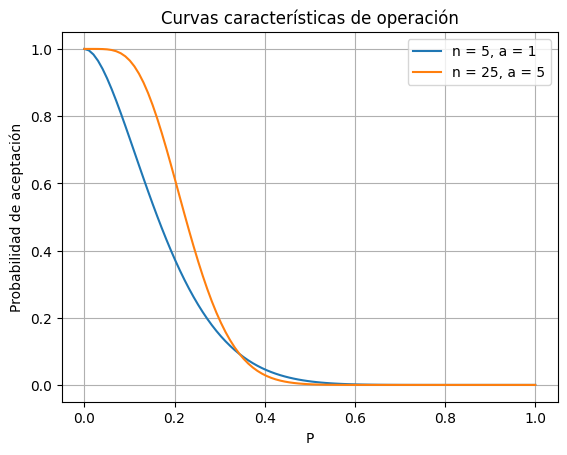

In [51]:
import matplotlib.pyplot as plt

p = np.linspace(0,1, 100)

def coef(n,k):
    return np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))


def aceptf(n,k):
    acept = np.zeros(100)
    for i in range(0,k+1):
        acept += coef(n,i)*p**i * (1-p)**(n-i)

    return acept

n1 = 10
k1 = 1

n2 = 25
k2 = 5

acept1 = aceptf(n1,k1)
acept2 = aceptf(n2,k2)

plt.figure(dpi=100)
plt.plot(p, acept1)
plt.plot(p, acept2)
plt.title("Curvas características de operación")
plt.xlabel("P")
plt.ylabel("Probabilidad de aceptación")
plt.legend(["n = 5, a = 1","n = 25, a = 5"])
plt.grid()
plt.show()






a) La curva de $n = 25, a = 5$ posee una mayor probabilidad de aceptación en el rango de 0 <= P <= 0.1 por lo tanto es la mejor opción.

b) En 0.3 hay menor probabilidad de aceptación en la curva de $n = 5, a = 1$, por lo tanto es la más conveniente como cliente.

2. El número de desconexiones del servidor de una compañía sigue una distribución de Poisson con una
tasa de una desconexión cada 4 horas.

a) Encuentre el menor valor de n tal que la probabilidad de que haya al menos n desconexiones en
menos de un período de 4 horas es menor que 0.01.

b) Encuentre el menor valor del número de horas h tal que la probabilidad de que no haya desconexiones
en h horas sea menor que 0.02.

c) Encuentre la probabilidad de que en 3 períodos consecutivos de 4 horas, haya solamente un período
de 4 horas sin desconexiones.

d) Encuentre la probabilidad de que el número de desconexiones en 3 períodos consecutivos de 4 horas
sea igual al número esperado de desconexiones en 3 períodos consecutivos de 4 horas.

In [55]:
import math

lamb = 4

p1 = 1
n = 0
while p1 > 0.01:
    p1 = np.e**(-lamb)*lamb**n/math.factorial(n)
    n += 1

na = n

p2 = 1
h = 0
while p2 > 0.02:
    p2 = np.e**(-h)*h**0/math.factorial(0)
    h += 1

hb = h

#Probabilidad de que no hayan desconexiones:
pnd = np.e**(-lamb)*lamb**0/math.factorial(0)

#probabilidad de que hayan desconexiones:
pde = 1-pnd

#probabilidad total:

pc = round(pnd * pde * pde,4)

#El numero esperado de desconexiones en tres periodos de cuatro horas sería de 3.

pd = round((np.e**(-lamb)*lamb**3/math.factorial(3)) * 3,4)

print("El menor valor de n tal que P(X = n) < 0.01 es de: " + str(na))
print("El menor valor de H tal que P(X = 0) < 0.02 es de: " + str(hb))
print("La probabilidad de que en tres periodos haya uno solo sin desconexiones es de: " + str(pc))
print("La probabilidad de que el numero de desconexiones en tres periodos sea igual a su valor esperado es de: " + str(pd))





El menor valor de n tal que P(X = n) < 0.01 es de: 11
El menor valor de H tal que P(X = 0) < 0.02 es de: 5
La probabilidad de que en tres periodos haya uno solo sin desconexiones es de: 0.0177
La probabilidad de que el numero de desconexiones en tres periodos sea igual a su valor esperado es de: 0.5861


## 3. Distribuciones de probabilidad continuas

1. Suponga que el error en la temperatura en un experimento controlado de laboratorio es una variable aleatoria continua X, que tiene la siguiente función de densidad de probabilidad:

\begin{equation}
f(x) = \left \{ \begin{aligned} \frac{x^2}{3} &\ (-1 \leq x \leq 2) \\ 0 \ &(\text{en otro caso})
\end{aligned} 
\right .
\end{equation}

Encuentre las probabilidades:

a) P(0 < X $\leq$ 1)\
b) P(1 < X $\leq$ 2)

In [8]:
from scipy.integrate import quad

def f(x):
    return x**2/3

#a) Se obtiene la probabilidad según la distribución continua de probabilidad
#con la integral apropiada

print("La probabilidad de P(0 < X <= 1)  es de", round(quad(f, 0, 1)[0],3))

#b) Se obtiene la probabilidad de la misma manera que en el literal a

print("La probabilidad de P(1 < X <= 2)  es de", round(quad(f, 1, 2)[0],3))

La probabilidad de P(0 < X <= 1)  es de 0.111
La probabilidad de P(1 < X <= 2)  es de 0.778


2. Se supone que las calificaciones de un examen están normalmente distribuidas con media 78 y varianza
de 36.

a) ¿Cuál es la probabilidad de que una persona que haga el examen alcance  calificaciones mayores de 72?

b) Suponga que los estudiantes que alcancen el 10% más alto de esta distribución reciben una calificación de A. ¿Cuál es la calificación mínima que un estudiante debe recibir para ganar una calificación de A?

c) ¿Cuál debe ser el punto límite para pasar el examen si el examinador desea pasar a sólo 28,1 % más alto de todas las calificaciones?

d) Aproximadamente qué proporción de estudiantes tienen calificaciones de 5 o más puntos arriba de la calificación que corta al 25 % más bajo?

e) Si se sabe que la calificación de un estudiante excede de 72, ¿cuál es la probabilidad de que su calificación exceda de 84?


In [18]:
import numpy as np
from scipy.stats import norm

#Se generan datos para la distribución normal acorde a la media y varianza 
#especificadas en el ejercicio
mu = 78
sigma = 36
N = 10000
x = np.random.normal(mu,sigma,N)

#a) 
conteo = 0 
for i in x:
    if i > 72:
        conteo +=1
print("a) Probabilidad puntaje > 72 =", round(conteo/N, 3))

#b) Se calcula el valor en el cual se obtiene el 90% de la distribución
#que a su vez es el mínimo dato del percentil-10 más alto
print("b) Nota mínima percentil-10 más alto =", round(norm.ppf(0.90,mu,sigma), 2))

#c)
print("c) Punto límite 28.1% más alto =", round(norm.ppf(1-0.281,mu,sigma), 2))

#d)
limite = norm.ppf(0.25,mu,sigma)
conteo = 0 
for i in x:
    if i >= limite + 5:
        conteo +=1
print("d) Proporción >=",round(limite+5,3),"=", round(conteo/N, 3))

#e) Se toma la probabilidad de que se obtenga un puntaje mayor de 72, tomando
#esta probabilidad como el máximo de proporción, se calcula la distribución de
#la probabilidad de que el puntaje sea mayor a 84
conteo = 0 
for i in x:
    if i > 72:
        conteo +=1
rango = conteo/N
conteo = 0 
for i in x:
    if i > 84:
        conteo +=1
proporcionInicial = conteo/N
print("e) Probabilidad puntaje > 84 si se sabe puntaje > 72 =", round(proporcionInicial/rango,3))

a) Probabilidad puntaje > 72 = 0.569
b) Nota mínima percentil-10 más alto = 124.14
c) Punto límite 28.1% más alto = 98.88
d) Proporción >= 58.718 = 0.704
e) Probabilidad puntaje > 84 si se sabe puntaje > 72 = 0.757


## 4. Cadenas de Markov

Las bases nitrogenadas fundamentales que componen el ADN son: Adenina (A), Citosina (C), Guanina (G) y Timina (T). Un gen se puede representar a través de una secuencia ordenada de dichas bases. Suponga la siguiente matriz de transición entre bases:

\begin{equation}
\mathbb{T} = \left(
\begin{matrix}
 & A & C & G & T\\
A & 0,4 & 0,25 & 0,3 & 0,1\\
C & 0,2 & 0,25 & 0,3 & 0,1\\
G & 0,2 & 0,25 & 0,1 & 0,1\\
T & 0,2 & 0,25 & 0,3 & 0,7
\end{matrix}
\right)
\end{equation}

La probabilidad a priori está dada por $\pi$ = [0,25, 0, 0,5, 0,25].
1. Encuentre la probabilidad de obtener el gen $g$ = [T, G, C, T, C, A, A, A].
2. Estas bases nitrogenadas pasarán por un proceso de traducción donde el objetivo es que se traduzcan A − U, C − G, G − C, T − A según la siguiente matriz de emisión

\begin{equation}
\mathbb{E} = \left(
\begin{matrix}
 & A & C & G & T\\
U & 0,8 & 0 & 0 & 0,2\\
C & 0,05 & 0,9 & 0,1 & 0,1\\
G & 0,05 & 0,1 & 0,9 & 0\\
A & 0,1 & 0 & 0 & 0,7
\end{matrix}
\right)
\end{equation}

Si un gen traducido está dado por $g_{T}$ = [A, C, G, A, G, U, U, U], ¿cuál es la probabilidad de que venga del gen $g$ anterior?


Literal a
[1. 1. 1. 1.] El estado inicial se cumple
Gen: TGCTCAAA
Estado actual: T - 0.25
Estado actual: TG - 0.03125
Estado actual: TGC - 0.0058203125
Estado actual: TGCT - 0.0025089184570312503
Estado actual: TGCTC - 0.0004549061181106569
Estado actual: TGCTCA - 0.00010268432322225664
Estado actual: TGCTCAA - 2.3077076652314995e-05
Estado actual: TGCTCAAA - 5.175719621125102e-06
Probabilidad Final: 5.18e-06


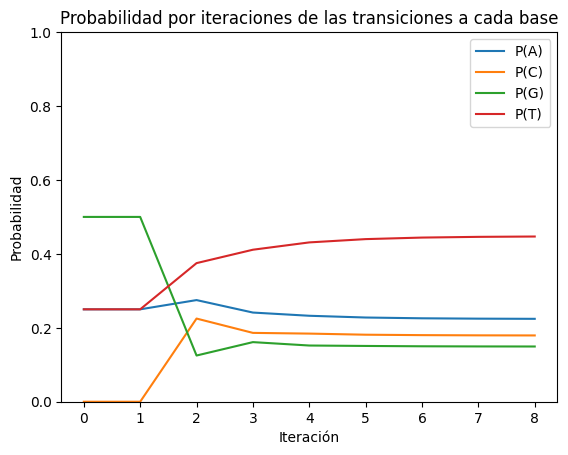

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#a)
print('Literal a')
#Se definen las posiciones para el alfabeto acorde a la situación planteada
abc = {'A':0,'C':1,'G':2,'T':3}

T = np.array([[0.4,0.25,0.30,0.10],\
              [0.2,0.25,0.30,0.10],\
              [0.2,0.25,0.10,0.10],\
              [0.2,0.25,0.30,0.70],\
             ])

#Comprobamos que se cumpla la condición base para Markov (todas las columnas
#deben dar una suma de 1)
print(np.sum(T,axis=0), "El estado inicial se cumple")

initial = np.array([0.25,0.,0.5,0.25])

#Delimitamos el número de transiciones, en este caso serán 8 para obtener
#el gen de 8 bases g = TGCTCAAA
g = 'TGCTCAAA'
print('Gen:', g)
probabilidad = 1
genActual = ""
estados = np.array(initial)
for base in g:
    pos = abc[base]
    probabilidad *= initial[pos]
    genActual += base
    estados = np.vstack((estados,initial))
    print("Estado actual:",genActual,"-", probabilidad)
    initial = np.dot(T,initial)
#Respuesta final
print("Probabilidad Final:", round(probabilidad,8))

plt.figure()
for i in range(estados.shape[1]):
    plt.plot(estados[:,i])
plt.title("Probabilidad por iteraciones de las transiciones a cada base")
plt.xlabel('Iteración')
plt.ylabel('Probabilidad')
plt.ylim((0,1))
plt.legend(['P(A)','P(C)','P(G)','P(T)'])
plt.show()

Literal b
[1. 1. 1. 1.] El estado inicial se cumple
Gen Traducido: ACGAGUUU
Estado actual: A - 0.25
Estado actual: AC - 0.115625
Estado actual: ACG - 0.018210937500000003
Estado actual: ACGA - 0.0025404257812500003
Estado actual: ACGAG - 0.0006603836818359376
Estado actual: ACGAGU - 0.00012570403383747075
Estado actual: ACGAGUU - 2.177935519864635e-05
Estado actual: ACGAGUUU - 3.421525812029743e-06
Probabilidad Final: 3.42e-06


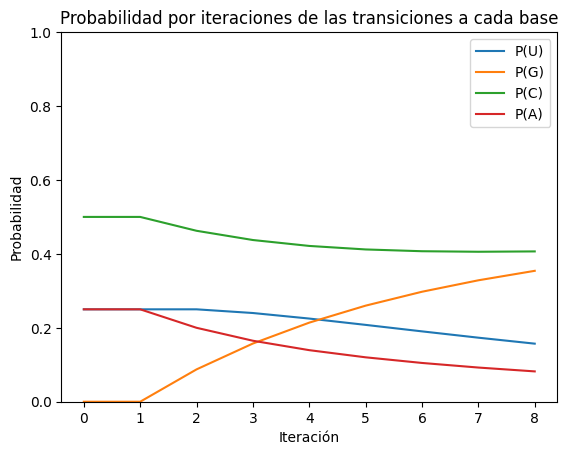

In [17]:
#a)
print('Literal b')
#Se definen las posiciones para el alfabeto acorde a la situación planteada
abc = {'U':0,'G':1,'C':2,'A':3}

T = np.array([[0.80,0.00,0.00,0.20],\
              [0.05,0.90,0.10,0.10],\
              [0.05,0.10,0.90,0.00],\
              [0.10,0.00,0.00,0.70],\
             ])

#Comprobamos que se cumpla la condición base para Markov (todas las columnas
#deben dar una suma de 1)
print(np.sum(T,axis=0), "El estado inicial se cumple")

initial = np.array([0.25,0.,0.5,0.25])

#Delimitamos el número de transiciones, en este caso serán 8 para obtener
#el gen de 8 bases g = TGCTCAAA
g = 'ACGAGUUU'
print('Gen Traducido:', g)
probabilidad = 1
genTraducidoActual = ""
estados = np.array(initial)
for base in g:
    pos = abc[base]
    probabilidad *= initial[pos]
    genTraducidoActual += base
    estados = np.vstack((estados,initial))
    print("Estado actual:",genTraducidoActual,"-", probabilidad)
    initial = np.dot(T,initial)
#Respuesta final
print("Probabilidad Final:", round(probabilidad,8))

plt.figure()
for i in range(estados.shape[1]):
    plt.plot(estados[:,i])
plt.title("Probabilidad por iteraciones de las transiciones a cada base")
plt.xlabel('Iteración')
plt.ylabel('Probabilidad')
plt.ylim((0,1))
plt.legend(['P(U)','P(G)','P(C)','P(A)'])
plt.show()